To solve this problem we first begin by programming a single random walk

In [1]:
import numpy as np
np.random.seed(123)

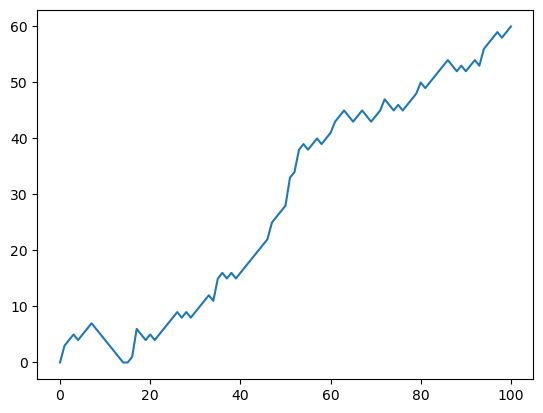

In [2]:
# NumPy is imported, seed is set

# Initialization
random_walk = [0]

for x in range(100) :
    step = random_walk[-1]
    dice = np.random.randint(1,7)

    if dice <= 2:
        step = max(0, step - 1)
    elif dice <= 5:
        step = step + 1
    else:
        step = step + np.random.randint(1,7)

    random_walk.append(step)

# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Plot random_walk
plt.plot(random_walk)

# Show the plot
plt.show()

But what if we can make multiple walks in this case we do 20

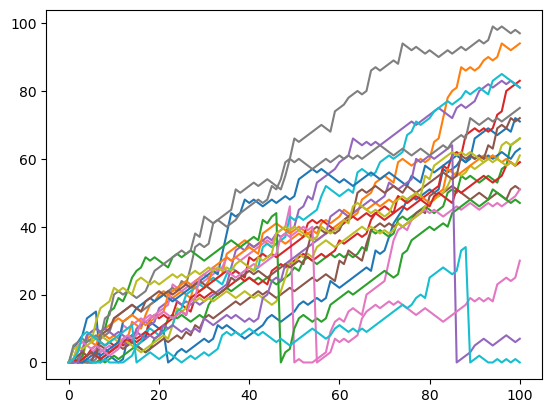

In [3]:
# numpy and matplotlib imported, seed set

# clear the plot so it doesn't get cluttered if you run this many times
plt.clf()

# Simulate random walk 20 times
all_walks = []
for i in range(20) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)

        # Implement clumsiness
        if np.random.rand() <= 0.005 :
            step = 0

        random_walk.append(step)
    all_walks.append(random_walk)

# Create and plot np_aw_t
np_aw_t = np.transpose(np.array(all_walks))
plt.plot(np_aw_t)
plt.show()

## Plot the distribution
All these fancy visualizations have put us on a sidetrack. We still have to solve the million-dollar problem: _What are the odds that you'll reach 60 steps high on the Empire State Building?_  
Basically, you want to know about the end points of all the random walks you've simulated. These end points have a certain distribution that you can visualize with a histogram.  
Note that if your code is taking too long to run, you might be plotting a histogram of the wrong data!

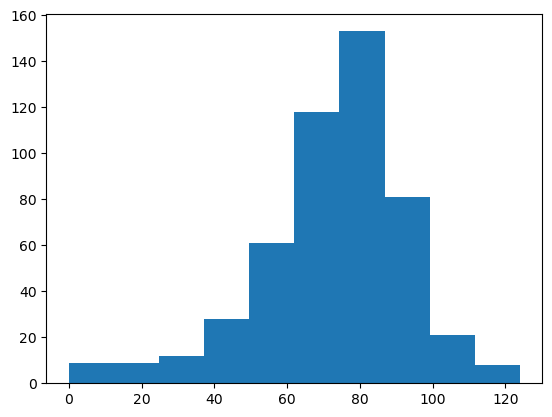

In [5]:
# numpy and matplotlib imported, seed set

# Simulate random walk 500 times
all_walks = []
for i in range(500) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        if np.random.rand() <= 0.001 :
            step = 0
        random_walk.append(step)
    all_walks.append(random_walk)

# Create and plot np_aw_t
np_aw_t = np.transpose(np.array(all_walks))

# Select last row from np_aw_t: ends
ends = np_aw_t[-1,:]

# Plot histogram of ends, display plot
plt.hist(ends)
plt.show()

## Calculate the odds
The previous histogram was created from a NumPy array ends, that contains 500 integers. Each integer represents the end point of a random walk. To calculate the chance that this end point is greater than or equal to 60, we count the number of integers in `ends` that are greater than or equal to 60 and divide that number by 500, the total number of simulations.

In [6]:

# Count qualifying end points
qualified_walks = np.sum(ends >= 60)

# Calculate probability
probability = qualified_walks / 500

print("Probability of ending at 60 or above:", probability)

Probability of ending at 60 or above: 0.792
